<h1 style="front-size=3rem;color:blue;"> Tutorial_2</h1>

In [1]:
import numpy as np
import pandas as pd

# Abrindo o banco

In [18]:
banco = pd.read_csv("candidatos_2018.csv")

# Acessando as Informações do banco

In [19]:
banco.columns

Index(['DT_GERACAO', 'HH_GERACAO', 'ANO_ELEICAO', 'CD_TIPO_ELEICAO',
       'NM_TIPO_ELEICAO', 'NR_TURNO', 'CD_ELEICAO', 'DS_ELEICAO', 'DT_ELEICAO',
       'TP_ABRANGENCIA', 'SG_UF', 'SG_UE', 'NM_UE', 'CD_CARGO', 'DS_CARGO',
       'SQ_CANDIDATO', 'NR_CANDIDATO', 'NM_CANDIDATO', 'NM_URNA_CANDIDATO',
       'NM_SOCIAL_CANDIDATO', 'NR_CPF_CANDIDATO', 'NM_EMAIL',
       'CD_SITUACAO_CANDIDATURA', 'DS_SITUACAO_CANDIDATURA',
       'CD_DETALHE_SITUACAO_CAND', 'DS_DETALHE_SITUACAO_CAND', 'TP_AGREMIACAO',
       'NR_PARTIDO', 'SG_PARTIDO', 'NM_PARTIDO', 'SQ_COLIGACAO',
       'NM_COLIGACAO', 'DS_COMPOSICAO_COLIGACAO', 'CD_NACIONALIDADE',
       'DS_NACIONALIDADE', 'SG_UF_NASCIMENTO', 'CD_MUNICIPIO_NASCIMENTO',
       'NM_MUNICIPIO_NASCIMENTO', 'DT_NASCIMENTO', 'NR_IDADE_DATA_POSSE',
       'NR_TITULO_ELEITORAL_CANDIDATO', 'CD_GENERO', 'DS_GENERO',
       'CD_GRAU_INSTRUCAO', 'DS_GRAU_INSTRUCAO', 'CD_ESTADO_CIVIL',
       'DS_ESTADO_CIVIL', 'CD_COR_RACA', 'DS_COR_RACA', 'CD_OCUPACAO',
       '

# Estatísticas descritivas

In [5]:
banco.DS_GENERO.value_counts()

MASCULINO    19666
FEMININO      8943
Name: DS_GENERO, dtype: int64

In [7]:
banco.DS_COR_RACA.value_counts()

BRANCA      15042
PARDA       10168
PRETA        3095
AMARELA       172
INDÍGENA      132
Name: DS_COR_RACA, dtype: int64

In [8]:
banco.NR_IDADE_DATA_POSSE.mean()

47.86343458352267

a media de idade dos candidatos é de 47,8 anos

In [9]:
banco.NR_IDADE_DATA_POSSE.describe()

count    28609.000000
mean        47.863435
std         13.567615
min         18.000000
25%         40.000000
50%         48.000000
75%         56.000000
max        999.000000
Name: NR_IDADE_DATA_POSSE, dtype: float64

# Filtering Observations

In [10]:
#checking how the office names are named
banco.DS_CARGO.value_counts()

DEPUTADO ESTADUAL     17699
DEPUTADO FEDERAL       8424
DEPUTADO DISTRITAL      968
2º SUPLENTE             372
1º SUPLENTE             365
SENADOR                 357
VICE-GOVERNADOR         199
GOVERNADOR              199
VICE-PRESIDENTE          13
PRESIDENTE               13
Name: DS_CARGO, dtype: int64

In [11]:
#working with data related to Federal Deputies candidates
dep_fed = banco[banco.DS_CARGO == 'DEPUTADO FEDERAL']

# Recoding variables

In [12]:
#changing the name of "black,pardo,yellow and indigenous" to "non-white"
dep_fed.DS_COR_RACA.value_counts()

BRANCA      4827
PARDA       2586
PRETA        911
AMARELA       61
INDÍGENA      39
Name: DS_COR_RACA, dtype: int64

In [21]:
#dep_fed.DS_COR_RACA.replace('PARDA','Não_Brancos').head()
#dep_fed.DS_COR_RACA.replace('PRETA','Não_Brancos').head()
#dep_fed.DS_COR_RACA.replace('INDIGENA','Não_Brancos').head()

dep_fed.loc[np.in1d(dep_fed.DS_COR_RACA, ['PARDA','PRETA','INDÍGENA','AMARELA']),'DS_COR_RACA']="Não_Brancos"
dep_fed.loc[np.in1d(dep_fed.DS_COR_RACA,'BRANCA'),'DS_COR_RACA']='Brancos'

In [22]:
dep_fed.DS_COR_RACA.value_counts()

Brancos        4827
Não_Brancos    3597
Name: DS_COR_RACA, dtype: int64

# Graphs

In [23]:
import matplotlib.pyplot as plt

In [24]:
base = dep_fed.DS_COR_RACA.value_counts()

In [25]:
index = base.index

In [26]:
values = base.values

<BarContainer object of 2 artists>

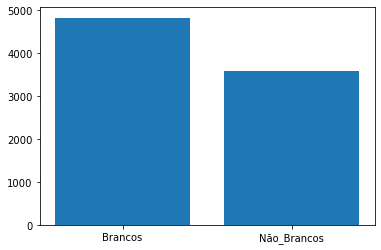

In [27]:
plt.bar(index,values)